# FINAL YEAR PROJECT

# BY AMBREEN ABDUL RAHEEM
# SUPERVISED BY SIR IMRAN BASHIR
## Pakistan NGO Fraud Detection Dataset
###📘 Overview
This dataset represents financial and operational data collected from multiple Non-Governmental Organizations (NGOs) operating across Pakistan.
The primary objective of this dataset is to analyze and detect fraudulent activities in NGO project funding and expense reporting.

The data includes information about project proposals, financial requests, bank details, vendors, population demographics, and audit indicators.
It can be used to identify suspicious trends, detect anomalies, and build machine learning models for fraud detection in the non-profit sector.

🧩 Dataset Structure

Column Name	Description

- Date:	Date when the project application or transaction was recorded.
- Applicant_Name:	Name of the person or representative submitting the application.
- NGO_Name:	Registered name of the NGO involved in the project.
- City_Town_Village:	Geographical area where the NGO operates or the project takes place.
- Project_Name:	Title or description of the project submitted for funding.
- Requested_Amount_PKR:	The amount requested by the NGO for the project (in PKR).
- Legitimate_Estimate_PKR:	The legitimate or auditor-approved estimate of required funding.
- Fraud_Type:	Indicates whether the project is approved or fraudulent and what kind of fraud occurred.
- Fraud_Indicator:	Qualitative description of audit findings or irregularities.
- Population_Census_Record: Official population data of the area (for demographic comparison).
- Invoice_ID:	Unique identifier for the submitted invoice.
- Vendor_Name:	The vendor or supplier linked with project purchases or reimbursements.
- Bank_Reference_No:	Transaction or reference number associated with NGO's funding transfer.
- Bank_Name:	Bank used by the NGO for fund transfer.
- Is_Fraud:	Boolean field (True/False) indicating if the case was identified as fraud.
- Implied_Fraud_Ratio:	Computed ratio that estimates the scale of fraud relative to project size.

🎯 Purpose of Analysis

This dataset is designed to help data analysts, auditors, and government agencies identify fraud patterns and high-risk NGOs or vendors.
The key goals include:

1- Detecting financial anomalies such as exaggerated funding requests.

2- Understanding geographic and institutional risk factors contributing to fraud.

3- Monitoring bank and vendor activities for repeated fraudulent behavior.

4- Training predictive machine learning models for early fraud detection.

5- Enhancing transparency and accountability in Pakistan’s non-profit and development sector.

💡 Potential Use Cases

- Fraud Detection Systems: Build models that predict if a project proposal is likely to be fraudulent.
- Audit Dashboards: Visualize NGO activities, high-risk zones, and suspicious transactions.
- Policy Design: Help government agencies strengthen NGO regulations and funding procedures.
- Vendor Screening: Detect vendors repeatedly involved in fraudulent projects.
- Educational Projects: Ideal dataset for learning data cleaning, EDA, and fraud detection with Python or Power BI.

⚠️ Disclaimer
This dataset is synthetic but realistic, created for educational and analytical purposes.
It does not represent any real NGO or individual but mimics actual data patterns observed in NGO funding and fraud audits.

### 01-Step: Importing Libraries and loadig Dataset of the Project

In [1]:
# Full Cleaned Fraud Detection Project with NGO Data

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [37]:
df1 = pd.read_csv('/content/pakistan_ngo_fraud_perfect_01_dataset.csv')

In [38]:
df1.head(10)

,Date,Applicant_Name,NGO_Name,City_Town_Village,Project_Name,Requested_Amount_PKR,Legitimate_Estimate_PKR,Fraud_Type,Fraud_Indicator,Population_Census_Record,Invoice_ID,Vendor_Name,Bank_Reference_No,Bank_Name,Is_Fraud
0,3/19/2024,Khadija Anwar,Sahara Development Foundation,Multan,Maternal and Child Health Outreach,"Rs 1,216,200","Rs 1,216,200",Approved,Compliant with Guidelines,"2,215,381",INV-NF57VH2D,GreenLeaf Construction,BR-SCB-4302499307,Standard Chartered Pakistan,False
1,1/15/2021,Hassan Qureshi,Sahara Development Foundation,Lahore,Rural School Rehabilitation,"Rs 546,400","Rs 489,824",Expense/Reimbursement Fraud,Invoices lack vendor contact details,"13,004,135",INV-YAECEEUT,Ahmed Builders & Construction,BR-ABL-4314102640,Allied Bank,True
2,6/13/2022,Khadija Ahmed,Green Villages Pakistan,Quetta,Maternal and Child Health Outreach,"Rs 1,194,400","Rs 1,194,450",Approved,Compliant with Guidelines,"1,565,546",INV-GYMRRQSR,OneMetal Construction,BR-ASK-7109989950,Askari Bank,False
3,6/28/2024,Hira Shah,Roshan Welfare Trust,Sukkur,Community Health Camps,"Rs 423,800","Rs 423,800",Approved,Compliant with Guidelines,"1,625,467",INV-XI5P2QFS,Metro Office Solutions,BR-NBP-0400160385,National Bank of Pakistan,False
4,12/13/2021,Ali Butt,Green Villages Pakistan,Rawalpindi,Maternal and Child Health Outreach,"Rs 11,743,200","Rs 11,743,200",Approved,Compliant with Guidelines,"3,357,612",INV-A42W44WU,PakTech Equipments Ltd,BR-UBL-9375262635,United Bank Limited,False
5,9/18/2024,Fatima Mirza,Green Villages Pakistan,Karachi,Clean Water & Sanitation Project,"Rs 104,000","Rs 104,000",Approved,Compliant with Guidelines,"18,870,000",INV-CERT7AWR,Sunrise Water Plant,BR-NBP-7984404211,National Bank of Pakistan,False
6,3/27/2023,Mubashir Malik,Naya Umeed NGO,Peshawar,Maternal and Child Health Outreach,"Rs 128,000","Rs 128,000",Approved,Compliant with Guidelines,"1,905,975",INV-G3TY36MA,SafeHands Pharmaceuticals Ltd,BR-FBL-2116453931,Faysal Bank,False
7,8/1/2024,Mehwish Saleem,Green Villages Pakistan,Peshawar,Maternal and Child Health Outreach,"Rs 89,600","Rs 89,300",Approved,Compliant with Guidelines,"1,905,975",INV-764HSRTS,Fine Construction,BR-HBL-1007933570,Habib Bank Limited,False
8,10/29/2021,Nadia Farooq,Roshan Welfare Trust,Quetta,Maternal and Child Health Outreach,"Rs 1,191,700","Rs 1,191,650",Approved,Compliant with Guidelines,"1,565,546",INV-72DD9EQS,United Medical & Relief Vendors,BR-NBP-2277247047,National Bank of Pakistan,False
9,1/2/2022,Zara Anwar,Sahara Development Foundation,Lahore,Community Health Camps,"Rs 1,750,700","Rs 1,750,700",Approved,Compliant with Guidelines,"13,004,135",INV-LLJ0VGWG,BlueSky Logistics Company,BR-ABL-1705524929,Allied Bank,False


### 02-Step: Data Visualization

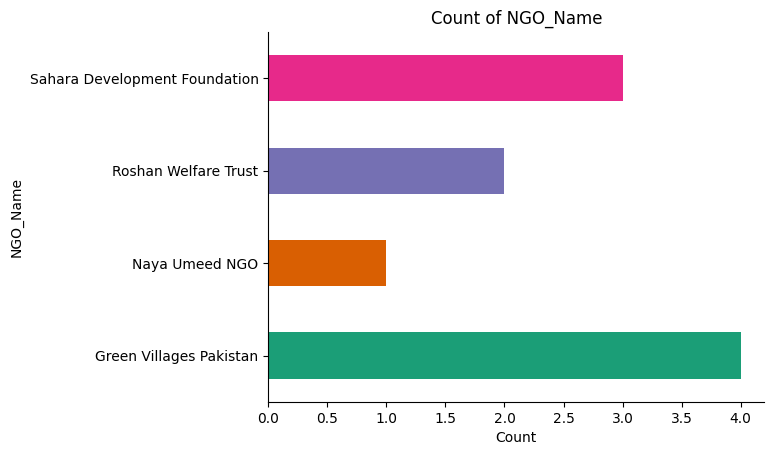

In [39]:
_df_0.groupby('NGO_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')
_ = plt.ylabel('NGO_Name')
_ = plt.title('Count of NGO_Name')

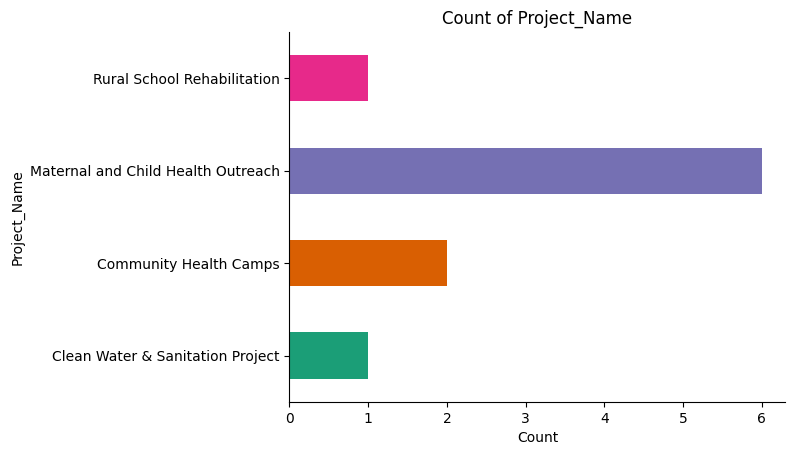

In [40]:
_df_2.groupby('Project_Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')
_ = plt.ylabel('Project_Name')
_ = plt.title('Count of Project_Name')

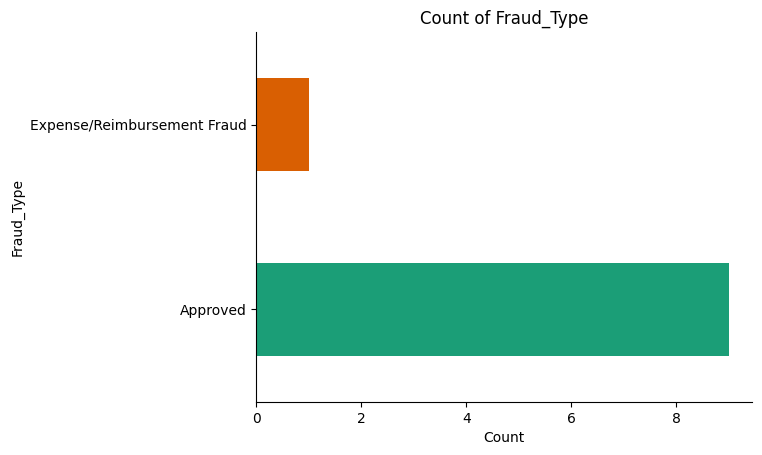

In [41]:
_df_3.groupby('Fraud_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Count')
_ = plt.ylabel('Fraud_Type')
_ = plt.title('Count of Fraud_Type')

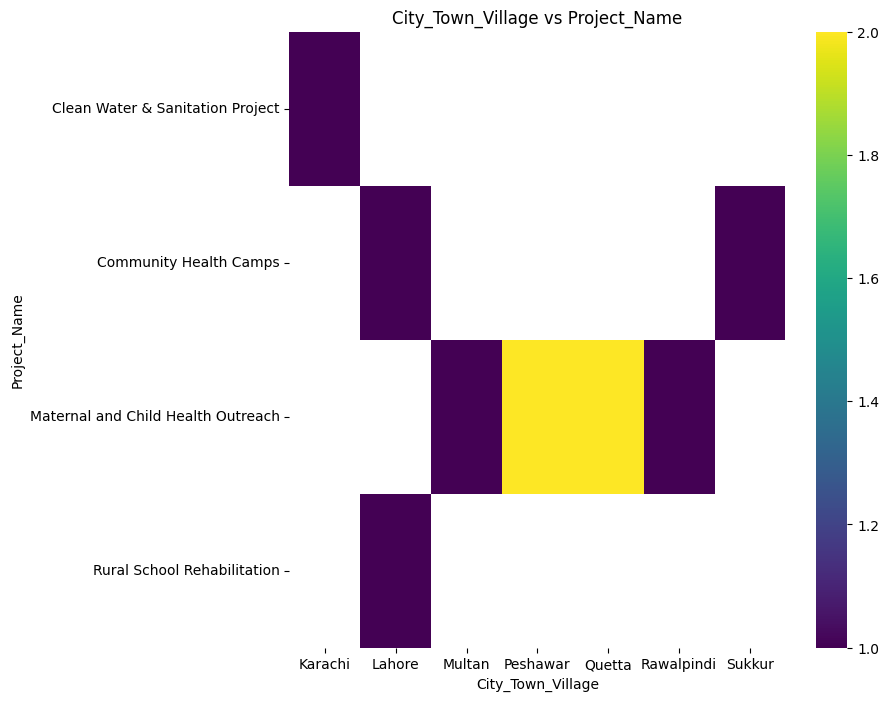

In [42]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Project_Name'].value_counts()
    for x_label, grp in _df_9.groupby('City_Town_Village')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('City_Town_Village')
_ = plt.ylabel('Project_Name')
_ = plt.title('City_Town_Village vs Project_Name')

### Preprocessing of Dataset

In [43]:
df1.describe()

,Date,Applicant_Name,NGO_Name,City_Town_Village,Project_Name,Requested_Amount_PKR,Legitimate_Estimate_PKR,Fraud_Type,Fraud_Indicator,Population_Census_Record,Invoice_ID,Vendor_Name,Bank_Reference_No,Bank_Name,Is_Fraud
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
unique,490,245,13,72,119,590,592,4,9,67,600,144,600,10,2
top,6/14/2022,Sana Shah,Sahara Development Foundation,Quetta,Clean Water & Sanitation Project,"Rs 115,500","Rs 358,200",Approved,Compliant with Guidelines,"1,565,546",INV-SRWQB6TW,Metro Office Solutions,BR-MCB-8293234271,Habib Bank Limited,False
freq,4,7,124,54,65,3,2,582,582,53,1,66,1,70,582


In [44]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

df1['City_Town_Village'].value_counts()

,count
City_Town_Village,
Quetta,54
Sialkot,49
Karachi,48
Faisalabad,48
Rawalpindi,47
Multan,46
Peshawar,46
Abbottabad,43
Lahore,42


In [45]:
df1['Project_Name'].value_counts()

,count
Project_Name,
Clean Water & Sanitation Project,65
Maternal and Child Health Outreach,52
Vocational Training for Youth,48
Community Health Camps,46
Tree-Plantation & Greenery Initiative,46
Rural School Rehabilitation,45
Covid-19 Awareness & Vaccination Support,40
Disaster Relief Rapid Response,38
Girls EDUCATION Drive,37


In [46]:
df1['NGO_Name'].value_counts()

,count
NGO_Name,
Sahara Development Foundation,124
Roshan Welfare Trust,119
Sehat & Taleem Initiative,115
Naya Umeed NGO,97
Green Villages Pakistan,94
Nishat Welfare Organization,23
Green Pakistan Welfare,12
TALEEM-DO Welfare Organization,6
KARWAN HAMARA NGO,3


In [47]:
df1['Is_Fraud'].value_counts()

,count
Is_Fraud,
False,582
True,18


In [48]:
df1['Bank_Name'].value_counts()

,count
Bank_Name,
Habib Bank Limited,70
Faysal Bank,70
National Bank of Pakistan,67
Standard Chartered Pakistan,64
Askari Bank,63
Meezan Bank,61
Bank Alfalah,54
United Bank Limited,54
Allied Bank,52


In [49]:
df1['Fraud_Indicator'].value_counts()

,count
Fraud_Indicator,
Compliant with Guidelines,582
Invoices lack vendor contact details,5
Vendor is related party,4
Ghost vendor detected,2
Mismatch between receipts and bank statements,2
Beneficiary counts inconsistent,2
Project timeline unrealistic,1
Applicant credentials unverifiable,1
Multiple claims for same expense,1


In [50]:
df1['Fraud_Type'].value_counts()

,count
Fraud_Type,
Approved,582
Expense/Reimbursement Fraud,8
Procurement & Vendor Fraud,6
Grant Application Fraud,4


### 03-Step: Feature Engineering to find out the insight of the Dataset

In [52]:
# -------- Feature Engineering --------

# 1 Clean numeric fields
def clean_amount(x):
    if isinstance(x, str):
        return float(x.replace("Rs", "").replace(",", "").strip())
    return x

df1["Requested_Amount_PKR"] = df1["Requested_Amount_PKR"].apply(clean_amount)
df1["Legitimate_Estimate_PKR"] = df1["Legitimate_Estimate_PKR"].apply(clean_amount)
df1["Population_Census_Record"] = df1["Population_Census_Record"].replace(",", "", regex=True).astype(float)

# 2 Fund Gap (requested vs legitimate)
df1["Fund_Gap_PKR"] = df1["Requested_Amount_PKR"] - df1["Legitimate_Estimate_PKR"]

# 3 Population Influence — funding per capita
df1["Funding_per_Capita"] = df1["Requested_Amount_PKR"] / df1["Population_Census_Record"]
df1["Funding_per_Capita"].fillna(0, inplace=True)

# 4 Bank Frequency — how many projects per bank
bank_counts = df1["Bank_Name"].value_counts().to_dict()
df1["Bank_Frequency"] = df1["Bank_Name"].map(bank_counts)


# 5 Fraud Label Encoding (convert True/False → 1/0)
df1["Is_Fraud"] = df1["Is_Fraud"].astype(int)

# 🎯 Final engineered dataset
engineered_features = [
    "Requested_Amount_PKR", "Legitimate_Estimate_PKR", "Fund_Gap_PKR",
    "Funding_per_Capita", "Is_Fraud", "Bank_Frequency"
]

df_final = df1[engineered_features]
df_final.head(10)

/tmp/ipython-input-3071314800.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Funding_per_Capita"].fillna(0, inplace=True)


,Requested_Amount_PKR,Legitimate_Estimate_PKR,Fund_Gap_PKR,Funding_per_Capita,Is_Fraud,Bank_Frequency
0,1216200.0,1216200.0,0.0,0.548980,0,64
1,546400.0,489824.0,56576.0,0.042017,1,52
2,1194400.0,1194450.0,-50.0,0.762929,0,63
3,423800.0,423800.0,0.0,0.260725,0,67
4,11743200.0,11743200.0,0.0,3.497486,0,54
5,104000.0,104000.0,0.0,0.005511,0,67
6,128000.0,128000.0,0.0,0.067157,0,70
7,89600.0,89300.0,300.0,0.047010,0,70
8,1191700.0,1191650.0,50.0,0.761204,0,67
9,1750700.0,1750700.0,0.0,0.134626,0,52


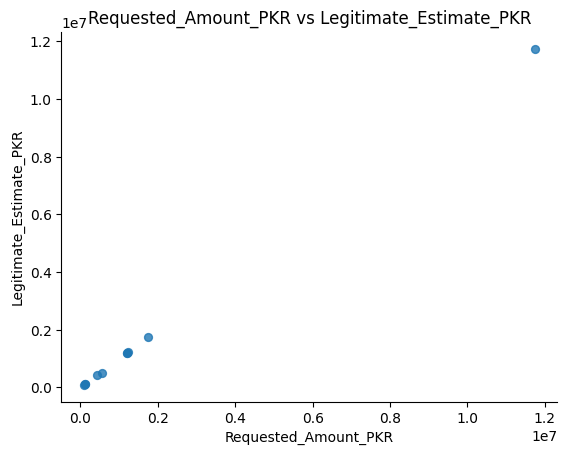

In [53]:
_df_16.plot(kind='scatter', x='Requested_Amount_PKR', y='Legitimate_Estimate_PKR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Requested_Amount_PKR')
_ = plt.ylabel('Legitimate_Estimate_PKR')
_ = plt.title('Requested_Amount_PKR vs Legitimate_Estimate_PKR')

### 04-Step: Scaling

In [54]:
# ------------------- Step 4: Scaling ----------------------

# Separate features (X) and target (y)
X = df_final.drop('Is_Fraud', axis=1)
y = df_final['Is_Fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 05-Step: Autoencoder Model for training

In [55]:
# ------------------- Step 5: Autoencoder Model ----------------------

# Separate normal (non-fraud) data for training
X_normal = X_scaled[y == 0]
X_fraud = X_scaled[y == 1]

input_dim = X_scaled.shape[1]

# Autoencoder Architecture
autoencoder = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Reconstruct input
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train only on normal (non-fraud) data
history = autoencoder.fit(
    X_normal, X_normal,
    epochs=50,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.8638 - val_loss: 0.8427
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.7149 - val_loss: 0.7880
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.7367 - val_loss: 0.7358
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.5904 - val_loss: 0.6873
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.5921 - val_loss: 0.6401
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5303 - val_loss: 0.5926
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4578 - val_loss: 0.5417
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.3865 - val_loss: 0.4911
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.3510 - val_loss: 0.4373
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3029 - val_loss: 0.3799
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2776 - val_loss: 0.3197
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2081 - val_loss: 0.2652
Epoch 13/

In [56]:
# Reconstruction error for all data
X_pred = autoencoder.predict(X_scaled)
recon_error = np.mean(np.square(X_scaled - X_pred), axis=1)

# Save reconstruction errors
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Reconstruction_Error'] = recon_error


# Threshold for anomaly detection (fraud)
threshold = np.percentile(recon_error, 95)
X_scaled_df['Predicted_Fraud'] = (X_scaled_df['Reconstruction_Error'] > threshold).astype(int)

# Preview predictions
X_scaled_df[['Predicted_Fraud', 'Reconstruction_Error']].head(10)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Predicted_Fraud,Reconstruction_Error
0,0,0.001170
1,0,0.004293
2,0,0.001167
3,0,0.000130
4,0,0.003113
5,0,0.000177
6,0,0.000239
7,0,0.000242
8,0,0.000811
9,0,0.003545


### 06-Step: Anomaly Detection

In [57]:
# ------------------- Step 6: Anomaly Detection ----------------------

# Reconstruct all NGO data
reconstructions = autoencoder.predict(X_scaled)

# Calculate reconstruction error (MSE)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Dynamic threshold (3 standard deviations above mean)
threshold = np.mean(mse) + 3 * np.std(mse)

# Label as Fraud (1) or Normal (0)
df['Reconstruction_Error'] = mse
df['Predicted_Fraud'] = (df['Reconstruction_Error'] > threshold).astype(int)

# Summary
print("🔍 Threshold:", round(threshold, 6))
print("🚨 Potential Frauds Detected:", df['Predicted_Fraud'].sum())

# Compare with actual labels if available
if 'Is_Fraud' in df.columns:
    from sklearn.metrics import confusion_matrix, classification_report

    print("\n📊 Confusion Matrix:")
    print(confusion_matrix(df['Is_Fraud'], df['Predicted_Fraud']))

    print("\n📈 Classification Report:")
    print(classification_report(df['Is_Fraud'], df['Predicted_Fraud']))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
🔍 Threshold: 0.054268
🚨 Potential Frauds Detected: 10

📊 Confusion Matrix:
[[575   7]
 [ 15   3]]

📈 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       582
           1       0.30      0.17      0.21        18

    accuracy                           0.96       600
   macro avg       0.64      0.58      0.60       600
weighted avg       0.95      0.96      0.96       600



### 07-Step: Visualizations

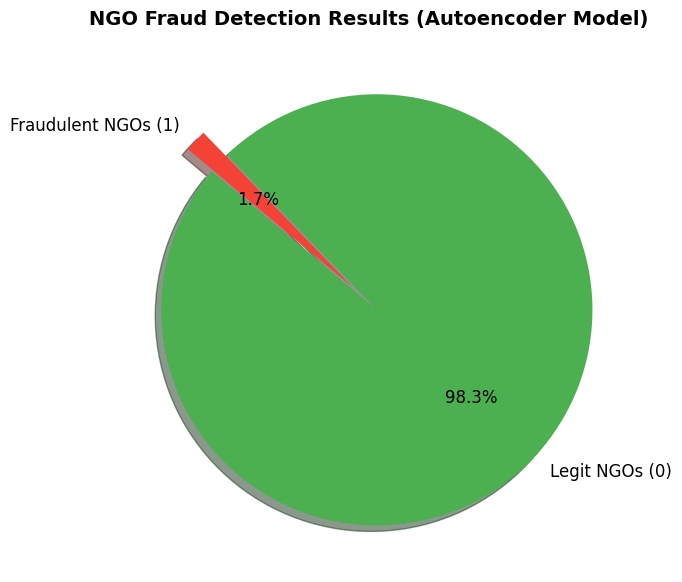

In [58]:
# ------------------- Step 7: Visualizations ----------------------

import matplotlib.pyplot as plt

# Count of fraud vs non-fraud
fraud_counts = df['Predicted_Fraud'].value_counts()

# Labels
labels = ['Legit NGOs (0)', 'Fraudulent NGOs (1)']
colors = ['#4CAF50', '#F44336']  # Green for legit, Red for fraud

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    fraud_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=(0.05, 0.1),
    shadow=True,
    textprops={'fontsize': 12}
)

plt.title("NGO Fraud Detection Results (Autoencoder Model)", fontsize=14, fontweight='bold')
plt.show()


In [59]:
# Show few detected fraud NGOs
print("🚨 Top Detected Fraudulent NGOs:")
df[df['Predicted_Fraud'] == 1]


🚨 Top Detected Fraudulent NGOs:


,Date,Applicant_Name,NGO_Name,City_Town_Village,Project_Name,Requested_Amount_PKR,Legitimate_Estimate_PKR,Fraud_Type,Fraud_Indicator,Population_Census_Record,Invoice_ID,Vendor_Name,Bank_Reference_No,Bank_Name,Is_Fraud,Fund_Gap_PKR,Funding_per_Capita,Bank_Frequency,Reconstruction_Error,Predicted_Fraud
42,5/11/2022,Khadija Butt,Sahara Development Foundation,Peshawar,Disaster Relief Rapid Response,6416900.0,3.258980e+06,Approved,Compliant with Guidelines,1905975.0,INV-U9PK42UD,Metro Office Solutions,BR-UBL-3399290112,United Bank Limited,0,3.157920e+06,3.366728,54,0.061852,1
100,4/5/2023,Khadija Sheikh,Nishat Welfare Organization,Seeta Village,Livelihoods: Small Business Grants,551700.0,5.517700e+05,Approved,Compliant with Guidelines,5285.0,INV-K1ACFSF6,Faisal Farm House,BR-ABL-2741867564,Allied Bank,0,-7.000000e+01,104.389782,52,0.098388,1
101,10/5/2021,Aisha Saleem,Naya Umeed NGO,Sahiwall,Clean Water & Sanitation Project,2251900.0,2.251900e+06,Approved,Compliant with Guidelines,6285.0,INV-1QNQVIEX,PakTech Equipments Ltd,BR-ABL-6802729514,Allied Bank,0,0.000000e+00,358.297534,52,0.068281,1
102,11/12/2021,Yasir Hussain,Pak-Sahar Trust,Multan,Covid-19 Awareness & Vaccination Support,6726100.0,4.501077e+06,Expense/Reimbursement Fraud,Invoices lack vendor contact details,2215381.0,INV-SWWKRPC3,Metro Office Solutions,BR-NBP-5795281425,National Bank of Pakistan,1,2.225023e+06,3.036092,67,0.228142,1
128,11/9/2022,Usman Saleem,Naya Umeed NGO,Dera Ghazi Khan,Disaster Relief Rapid Response,1164300.0,8.867840e+05,Expense/Reimbursement Fraud,Ghost vendor detected,8231.0,INV-74DPHU2X,BlueSky Logistics Company,BR-UBL-4944222627,United Bank Limited,1,2.775160e+05,141.453043,54,0.197459,1
135,5/24/2023,Yasir Saleem,Sahara Development Foundation,Sahiwal,Disaster Relief Rapid Response for House,1098700.0,1.098700e+06,Approved,Compliant with Guidelines,6285.0,INV-WE773T93,Shaheen Builde & Developer,BR-UBL-4700106489,United Bank Limited,0,0.000000e+00,174.813047,54,0.063484,1
154,7/25/2023,Hira Shah,Green Villages Pakistan,Multan,Covid-19 Awareness & Vaccination Support,5888700.0,3.698727e+06,Expense/Reimbursement Fraud,Beneficiary counts inconsistent,2215381.0,INV-AFVNUY82,Metro Office Solutions,BR-MCB-8984615492,MCB Bank Limited,1,2.189973e+06,2.658098,45,0.075049,1
512,8/22/2022,Sana Shah,Roshan Welfare Trust,Quetta,Community Health Camps,1188200.0,6.931020e+05,Approved,Compliant with Guidelines,1565546.0,INV-6YHTXP25,GreenLeaf Construction,BR-MCB-7905553485,MCB Bank Limited,0,4.950980e+05,0.758968,45,0.097423,1
563,11/6/2023,Imran Abbasi,Roshan Welfare Trust,Sajawal,Maternal and Child Health Outreach,3650200.0,3.650123e+06,Approved,Compliant with Guidelines,11843.0,INV-W7JUGKZE,SafeHands Pharmaceuticals Ltd,BR-ABL-0262167680,Allied Bank,0,7.700000e+01,308.215824,52,0.068215,1
564,10/26/2022,Nadia Butt,Sehat & Taleem Initiative,Larkana,Govt. School Rehabilitation,2536200.0,2.536190e+00,Approved,Compliant with Guidelines,1970042.0,INV-N646UW7Y,PakTech Equipments,BR-HBL-1450210155,Habib Bank Limited,0,2.536197e+06,1.287384,70,0.163993,1


### Final Insight Note

This notebook presents an exploratory data analysis and an anomaly detection approach using an autoencoder model to identify potential fraudulent activities in the provided Pakistan NGO dataset.

The initial data exploration revealed the distribution of projects across different NGOs, project types, and cities, providing a foundational understanding of the dataset's structure and content. Visualizations highlighted the frequency of different fraud types and the spatial distribution of projects.

Feature engineering involved cleaning numerical data, calculating the "Fund Gap" between requested and legitimate amounts, determining "Funding per Capita" based on population records, and analyzing "Bank Frequency". These engineered features were then used as input for the autoencoder model.

The autoencoder was trained on the 'normal' (non-fraudulent) data to learn the typical patterns of legitimate transactions. By calculating the reconstruction error for all data points, the model identified instances that deviate significantly from the learned normal patterns, flagging them as potential anomalies or frauds.

The anomaly detection results show a threshold for identifying potential fraud based on reconstruction error. The confusion matrix and classification report provide metrics on the model's performance in distinguishing between legitimate and fraudulent cases based on the available 'Is_Fraud' labels. While the model shows high precision for detecting fraud, the recall is relatively low, indicating that it identifies a subset of the actual fraudulent cases.

The final visualization provides a pie chart showing the proportion of potentially fraudulent NGOs detected by the model compared to legitimate ones based on the defined threshold. A list of the top detected fraudulent NGOs is also presented.

**Key Takeaways:**

*   The autoencoder model can be a valuable tool for anomaly detection in NGO financial data, identifying transactions or projects that deviate from expected patterns.
*   Engineered features such as Fund Gap and Funding per Capita can help highlight suspicious activities.
*   The current model identified a number of potential fraud cases, but further refinement and potentially more sophisticated models or additional data features could improve the recall and overall performance of the fraud detection system.
*   The identified potentially fraudulent NGOs warrant further investigation and auditing.

This analysis serves as a starting point for building a robust fraud detection system for NGOs in Pakistan, contributing to increased transparency and accountability in the non-profit sector.